# Holt’s linear trend method


In [122]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')


col_names =  ['Day', 'Value']
data  = pd.DataFrame(columns = col_names)

data['Day'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
data['Value'] = [39,44,40,45,41,46,42,47,43,48,44,48,45,50]
data

,Day,Value
0,1,39
1,2,44
2,3,40
3,4,45
4,5,41
5,6,46
6,7,42
7,8,47
8,9,43
9,10,48


**Holt (1957) extended simple exponential smoothing to allow the forecasting of data with a trend. This method involves a forecast equation and two smoothing equations (one for the level and one for the trend):**



\begin{align*}
  \text{Forecast equation}&& \hat{y}_{t+h|t} &= \ell_{t} + hb_{t} \\
  \text{Level equation}   && \ell_{t} &= \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  \text{Trend equation}   && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1},
\end{align*}


where  
ℓt
  denotes an estimate of the level of the series at time  t
 ,  
bt
  denotes an estimate of the trend (slope) of the series at time  t
 ,  
α
  is the smoothing parameter for the level,  
0
≤
α
≤
1
 , and  
β
∗
  is the smoothing parameter for the trend,  
0
≤
β
∗
≤
1

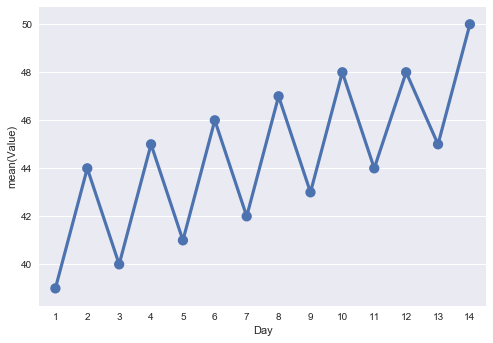

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(x='Day', y='Value', data=data)
plt.show()

There is an overall **increasing trend** and hence we can make use of Holts method

We normally obtain the initial level and slope values by **MINIMIZING SUM SQUARED ERROR OVER PERIODS T (here 14)**

Obtain initial estimates l0 and b0 by fitting a least squares trend line to the historical data.

** y-intercept = l0 ; slope = b0**

In [124]:
### FINDING THE SLOPE AND GRADIENT

x_mean = sum(data['Day'])/len(data)
y_mean = sum(data['Value'])/len(data)

numerator = []
denominator = []
for i in range(1,len(data)):
    x_val = (data['Day'][i] - x_mean)
    y_val = (data['Value'][i] - y_mean)
    numerator.append(x_val * y_val)
    denominator.append(x_val * x_val)
b0 = sum(numerator)/sum(denominator)
l0 = y_mean - (b0*x_mean)

** Equation :**     y = 0.484(x) + 40.796

In [125]:
print("SLOPE IS b0:",    b0)
print("INTERCEPT IS l0:",l0)

SLOPE IS b0: 0.4842876421823789
INTERCEPT IS l0: 40.796414112203585


In [126]:
#### CONSIDER THE PARAMETERS ALPHA = 0.2 AND BETA = 0.1 ####

alpha = 0.2
beta = 0.1
l = [0] * (len(data)+1)
b = [0] * (len(data)+1)
l[0] = (l0)
b[0] = (b0)
forecast = []

for i in range(0,len(data)):
    forecast.append(b[i] + l[i])
    l[i+1] = (alpha*data['Value'][i]) + (1-alpha)*(b[i]+l[i])
    b[i+1] = beta*(l[i+1] - l[i]) + (1-beta)*b[i]

In [127]:
data['Level Lt'] = l[1:]
data['Slope Bt'] = b[1:]
data['Forecast'] = forecast

## Applying Holt’s linear method with  
α =
0.2
  and  
β =
0.1

In [128]:
data.loc[-1] = [0, 'NA' ,40.796414112203585, 0.4842876421823789,'NA' ]  # adding a row
data.index = data.index + 1  # shifting index
data = data.sort_index()  # sorting by index
data

,Day,Value,Level Lt,Slope Bt,Forecast
0,0,NA,40.796414,0.484288,NA
1,1,39,40.824561,0.438674,41.2807
2,2,44,41.810588,0.493409,41.2632
3,3,40,41.843198,0.447329,42.304
4,4,45,42.832421,0.501518,42.2905
5,5,41,42.867152,0.454840,43.3339
6,6,46,43.857593,0.508400,43.322
7,7,42,43.892794,0.461080,44.366
8,8,47,44.883099,0.514002,44.3539
9,9,43,44.917682,0.466060,45.3971


### Lets calculate the error

In [129]:
data = data[1:]

In [130]:
error = []
error_sq = []
for i in range(1,len(data)+1):
    e = data['Value'][i] - data['Forecast'][i]
    error.append(e)
    error_sq.append(e*e)
data['Error'] = error
data['Error_Square'] = error_sq

In [131]:
data

,Day,Value,Level Lt,Slope Bt,Forecast,Error,Error_Square
1,1,39,40.824561,0.438674,41.2807,-2.280702,5.201600
2,2,44,41.810588,0.493409,41.2632,2.736765,7.489883
3,3,40,41.843198,0.447329,42.304,-2.303997,5.308402
4,4,45,42.832421,0.501518,42.2905,2.709473,7.341247
5,5,41,42.867152,0.454840,43.3339,-2.333940,5.447274
6,6,46,43.857593,0.508400,43.322,2.678009,7.171730
7,7,42,43.892794,0.461080,44.366,-2.365993,5.597922
8,8,47,44.883099,0.514002,44.3539,2.646126,7.001981
9,9,43,44.917682,0.466060,45.3971,-2.397102,5.746098
10,10,48,45.906994,0.518386,45.3837,2.616258,6.844806


In [134]:
sum(data['Error_Square'])/ len(data)

6.010390950769211

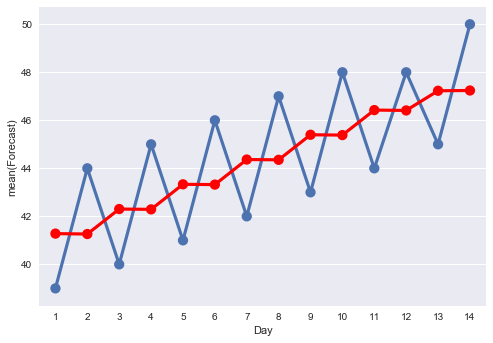

In [133]:
fig, ax = plt.subplots()
sns.pointplot(x='Day', y='Value', data=data, ax=ax)
sns.pointplot(x='Day', y='Forecast', data=data, ax=ax, color='r')
sns.plt.show()

# LOOKS LIKE WE ARE ABLE TO CAPTURE THE TREND (UPWARD)